In [2]:
import pandas as pd
import numpy as np

# Pandas

## Повторение

### Создание DataFrame

In [10]:
ages = [25, 35, 45]
heights = [170, 180, 190]
names = ["Alex", "Polina", "Misha"]
data = {'age': ages, 'height': heights, 'name': names}
indexes = ['A', 'B', 'C']
df = pd.DataFrame(data, index=indexes)
df

,age,height,name
A,25,170,Alex
B,35,180,Polina
C,45,190,Misha


### Выбор столбца

In [11]:
df['age'] # Получится Series

A    25
B    35
C    45
Name: age, dtype: int64

In [12]:
df[['age']] # Получится DataFrame

,age
A,25
B,35
C,45


### Выбор строк

- `loc` - если хотим взять по индексу
- `iloc` - если хотим взять по порядковому номеру


In [13]:
df.iloc[0]

age         25
height     170
name      Alex
Name: A, dtype: object

In [17]:
df.iloc[0:2]  # Можно делать слайсы, как в list

,age,height,name
A,25,170,Alex
B,35,180,Polina


In [15]:
df.loc['A']

age         25
height     170
name      Alex
Name: A, dtype: object

In [16]:
df.loc[['A', 'B']] # Несколько значений нужно положить в список

,age,height,name
A,25,170,Alex
B,35,180,Polina


#### Важно!

Обратите внимание, что если вы извлекаете одну строку или одну колонку получается обьект Series, а если несколько, то DaraFrame. Необходимо помнить, что это разные обьекты и работать с ними иногда приходится по разному. 

Если хотите избежать таких ситуаций, то передавайте даже одно значение в списке:

In [18]:
df.iloc[[0]]

,age,height,name
A,25,170,Alex


In [20]:
df.loc[['B']]

,age,height,name
B,35,180,Polina


In [22]:
df[['age']]

,age
A,25
B,35
C,45


### Фильтрация по условию

Одно условие

In [23]:
df[df['age'] == 25]

,age,height,name
A,25,170,Alex


Несколько условий

In [24]:
df[(df['age'] > 35) & (df['height'] > 170)]

,age,height,name
C,45,190,Misha


#### Важно!

При фильтрации по условию вы не можете изменить значения в таблице, потому что вы создаете копию таблицы. Чтобы что-то поменять используйте `loc`

In [27]:
df.loc[df['age'] == 25, 'age'] = 20
df

,age,height,name
A,20,170,Alex
B,35,180,Polina
C,45,190,Misha


### Создание колонок



In [28]:
df['height/age'] = df['height'] / df['age']
df

,age,height,name,height/age
A,20,170,Alex,8.500000
B,35,180,Polina,5.142857
C,45,190,Misha,4.222222


### Импорт данных из файла

In [32]:
df = pd.read_csv('../data/weather.csv') # Импортируем данные

df["Day"] = pd.to_datetime(df["Day"]) # Преобразовываем в дату
df["year"] = df.Day.dt.year           # Создаем новые колонки
df["month"] = df.Day.dt.month
df["day"] = df.Day.dt.day

df.head()                             # Выводим что получилось

,Day,t,year,month,day
0,2008-01-01,0,2008,1,1
1,2008-01-02,-5,2008,1,2
2,2008-01-03,-11,2008,1,3
3,2008-01-04,-11,2008,1,4
4,2008-01-05,-12,2008,1,5


### Группировка значений

Чтобы сгруппировать значения в таблице необходимо использовать метод groupby и передать ему имя колонки по которой будем группировать

Потом необходимо воспользовать какой-нибудь функцией аггригации. Функции аггригации

- `.min()`    - найти минимум
- `.max()`    - найти максимум
- `.std()`    - посчитать стандартное отклонение
- `.mean()`   - посчитать среднее арифметическое
- `.median()` - посчитать медиану
- `.count()`  - посчитать колличество

In [34]:
df.groupby(["year", "month"]).mean()

t        day
year month                      
2008 1      -1.612903  16.000000
     2       0.034483  15.000000
     3       1.516129  16.000000
     4       9.566667  15.500000
     5      14.133333  16.333333
...               ...        ...
2016 8      19.161290  16.000000
     9      14.366667  15.500000
     10      5.870968  16.000000
     11     -1.433333  15.500000
     12     -0.806452  16.000000

[108 rows x 2 columns]

Либо можно воспользоваться методом `.agg` и передать туда свою функцию аггрегации

In [35]:
df.groupby(["year", "month"]).agg(sum)

t  day
year month          
2008 1      -50  496
     2        1  435
     3       47  496
     4      287  465
     5      424  490
...         ...  ...
2016 8      594  496
     9      431  465
     10     182  496
     11     -43  465
     12     -25  496

[108 rows x 2 columns]

### Задача

Вывести среднюю температуру за март 2011 года

## Задача

Вывести среднее, максимальное, минимальное, стандартное отклонение и медиану температуры за каждый год

## Задача

Необходимо узнать насколько медиана отличалась от среднего в каждом месяце. Использовать agg для решения

## Новые знания

### Лямбда функции

In [44]:
def f(a, b):
    return a + b


g = lambda a, b: a + b

In [45]:
f(1, 2)

3

In [46]:
g(1, 2)

3

На самом деле лямбда функции не стоит привязывать к какой-то переменной. Потому что лямбда функции задумывались как безымянные функции, которые надо применить и потом забыть.

Лямбда функции можно использовать, например, в методе apply

### Метод apply

Метод apply применяет функцию к каждому елементу колонки.

In [47]:
df

,a,b,c
0,None,1.0,2
1,None,2.0,3
2,None,NaN,4


In [48]:
df['new_column'] = df['c'].apply(lambda x: 'f(' + str(x) + ')')

df

,a,b,c,new_column
0,None,1.0,2,f(2)
1,None,2.0,3,f(3)
2,None,NaN,4,f(4)


#### Важно! 

Apply работает довольно медленно. Старайтесь избегать его использования, если на это нет необходимости.

### Работа с пропусками

Часто в реальных данных есть пропуски. Их надо либо убирать, либо заполнять

In [36]:
values = [[None, 1, 2], [None, 2, 3], [None, None, 4]]
df = pd.DataFrame(values, columns=["a", "b", "c"])
df

,a,b,c
0,None,1.0,2
1,None,2.0,3
2,None,NaN,4


За удаление отвечает функция `dropna()`

У dropna есть два важных аргумента:

- axis (по-умолчанию 0) - по строкам или по колонкам будем искать наны
- how (по-умолчанию 'any') - бывает any и all, ниже пример использования

Удаляем столбец `a`, потому что в нем все (all) значения None

Сохраним датафрейм, он понадобится ниже

In [37]:
dropped_a = df.dropna(axis=1, how='all')
dropped_a

,b,c
0,1.0,2
1,2.0,3
2,NaN,4


Удаляем столбцы `a` и `b`, потому что в них есть None (any)

In [38]:
df.dropna(axis=1, how='any')

,c
0,2
1,3
2,4


Возьмем датафрейм выше. Удалим из него последнюю строку, так как в ней есть None

In [39]:
dropped_a.dropna(axis=0, how='any')

,b,c
0,1.0,2
1,2.0,3


Заполним пустые значения 0

In [40]:
df.fillna(0)

,a,b,c
0,0,1.0,2
1,0,2.0,3
2,0,0.0,4


Заполним последним известным значением

In [43]:
df.ffill()
# Тоже самое, что и df.fillna(method="ffill")

,a,b,c
0,None,1.0,2
1,None,2.0,3
2,None,2.0,4


### Задача

Получить последние n строк объекта DataFrame, где сумма строк больше 100

In [52]:
sum_level = 100
last_row = 2
 
df = pd.DataFrame(data=np.random.randint(low=10, high=30, size=[50]).reshape(10, 5))
 
df


,0,1,2,3,4
0,23,15,25,20,12
1,20,10,22,27,29
2,11,29,29,17,25
3,18,25,27,16,19
4,20,26,22,19,20
5,27,24,20,13,29
6,13,29,18,24,29
7,26,20,27,29,25
8,12,10,12,19,29
9,13,22,25,13,11


In [54]:
# Ваш код здесь

### Задача

Создать категорию "высокий", если человек выше 175, а иначе "низкий"

In [56]:
ages = [25, 35, 45, 21, 12]
heights = [170, 180, 190, 175, 120]
names = ["Alex", "Polina", "Misha", 'Maria', 'Kirill']
data = {'age': ages, 'height': heights, 'name': names}
df = pd.DataFrame(data)
df

,age,height,name
0,25,170,Alex
1,35,180,Polina
2,45,190,Misha
3,21,175,Maria
4,12,120,Kirill


In [57]:
# Ваш код здесь

# [Matplotlib](https://matplotlib.org/stable/index.html)

## Установка

```
conda install matplotlib
```

In [18]:
import matplotlib.pyplot as plt

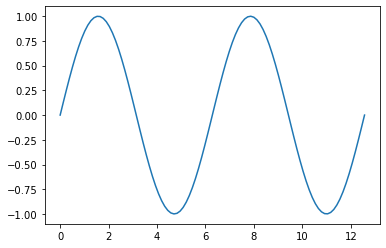

In [19]:
x = np.linspace(0, 4 * np.pi, 100)
y = np.sin(x)

plt.plot(x, y)

Text(0.5, 0, 'От 5 до 10')

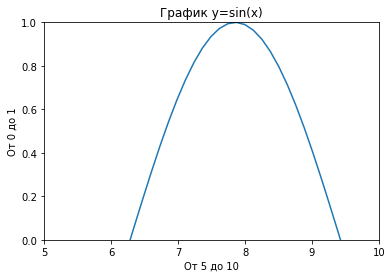

In [20]:
plt.plot(x, y)
plt.xlim(5, 10)
plt.ylim(0, 1)
plt.title("График y=sin(x)")
plt.ylabel("От 0 до 1")
plt.xlabel("От 5 до 10")

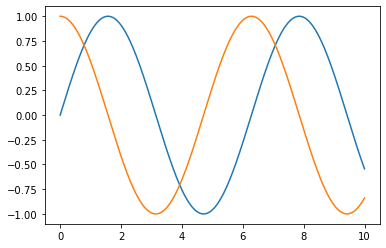

In [21]:
x = np.linspace(0, 10, 1000)
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x, y1)
plt.plot(x, y2)

График рассеивания

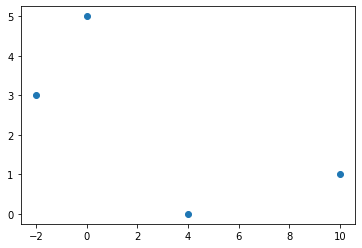

In [22]:
dots = np.array([
    (0, 5),
    (4, 0),
    (-2, 3),
    (10, 1),
])

plt.scatter(dots[:, 0], dots[:, 1])

Подграфики

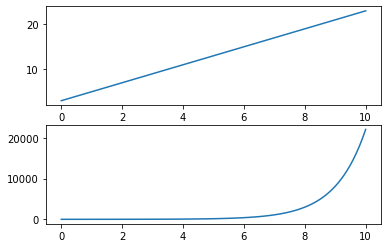

In [23]:
fig, axs = plt.subplots(2)

x = np.linspace(0, 10, 100)
y1 = x * 2 + 3
y2 = np.exp(x)
axs[0].plot(x, y1)
axs[1].plot(x, y2)

## Задача

Нарисовать $n$ линий.

Написать функцию, которая на вход принимает параметр $n$ и рисует $n$ графиков по такому приципу:

$$y = x$$
$$y = 2x$$
$$y = 3x$$
$$...$$
$$y = nx$$

Здесь можно использовать циклы.

Подсказка: сначала можно написать код для рисования одной линии, потом решить задачу, а в конце обернуть в функцию

In [24]:
def draw_n_lines(n):
    pass

In [25]:
draw_n_lines(5)

## Задача

По заданным точкам нарисовать квадрат.

In [26]:
square_coord = [
    (0, 0),
    (1, 0),
    (1, 1),
    (0, 1)
]

# Ваш код здесь


## Задача

Адаптировать код из задачи выше для того, чтобы он рисовал любую замкнутую фигуру.

Например, можно убрать одну любую точку и должен получиться треугольник

In [27]:
# Ваш код здесь


# Seaborn
Seaborn — это библиотека для создания статистических графиков на Python. Она основывается на matplotlib и тесно взаимодействует со структурами данных pandas.

In [29]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)}) # Увеличить размер графика

В seaborn есть встроенные датасеты для демонстрации. Воспользуемся набором данных о рейсах самолетов 

In [30]:
flights_data = sns.load_dataset("flights")
flights_data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


## Диаграмма рассеяния — Scatter Plot
Диаграмма рассеяния — это диаграмма, которая отображает точки на основе двух измерений набора данных. Создать диаграмму рассеяния в seaborn очень просто, ведь для этого нужна всего одна строчка кода.

<AxesSubplot:xlabel='year', ylabel='passengers'>

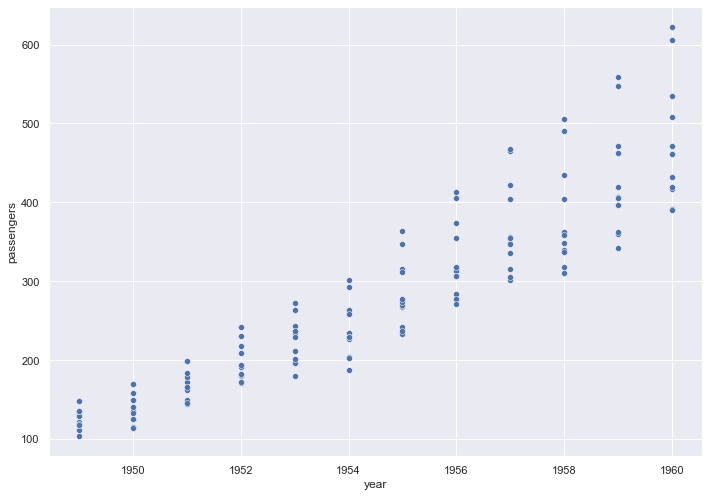

In [31]:
sns.scatterplot(data=flights_data, x="year", y="passengers")

## Линейный график — Line Plot

Этот график рисует линию, которая представляет собой развитие непрерывных или категориальных данных. Этот вид графиков популярен и известен, и его легко создать. Как и раньше, мы воспользуемся функцией lineplot с набором данных и столбцами, представляющими оси x и y. Остальное за нас сделает seaborn.

<AxesSubplot:xlabel='year', ylabel='passengers'>

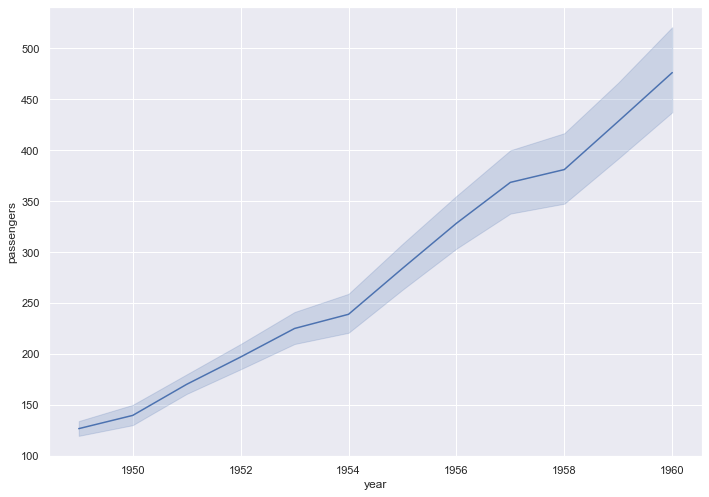

In [32]:
sns.lineplot(data=flights_data, x="year", y="passengers")

## Столбчатая диаграмма — Bar Plot
Наверное, это самый известный тип диаграммы, и, как вы уже догадались, мы можем построить этот тип диаграмм с помощью seaborn, также, как мы сделали это для линейного графика и диаграммы рассеяния, с помощью функции barplot.

<AxesSubplot:xlabel='year', ylabel='passengers'>

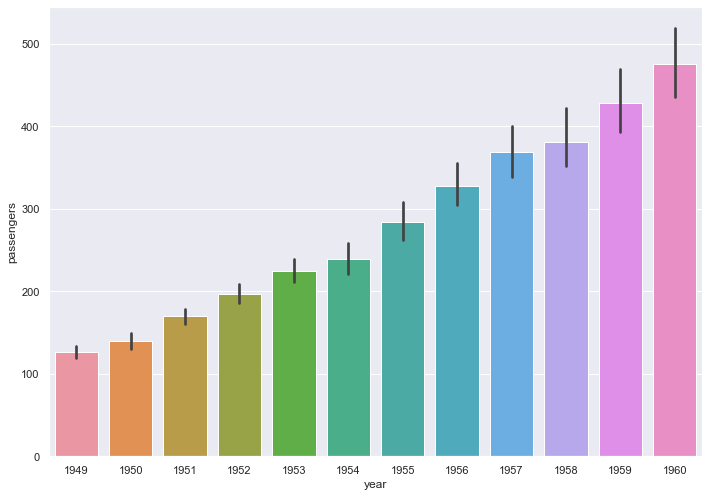

In [33]:
sns.barplot(data=flights_data, x="year", y="passengers")

## Расширение функционала с matplotlib
Seaborn основывается на matplotlib, расширяя ее функциональные возможности и абстрагируя сложность. При этом seaborn не теряет в своей мощности. Любая диаграмма seaborn может быть кастомизирована с помощью функций из библиотеки matplotlib. Эта механика может пригодиться в определенных случаях и позволяет seaborn использовать возможности matplotlib без необходимости переписывать все ее функции.

Допустим, вы хотите построить несколько диаграмм одновременно с помощью seaborn, в этом случае вы можете воспользоваться функцией subplot из matplotlib.

С помощью функции subplot на одном графике можно построить несколько диаграмм. Функция принимает в себя три параметра: первый – количество строк, второй – количество столбцов, третий – количество диаграмм.

Мы визуализируем по одной диаграмме seaborn на каждой части графика, смешивая функционал matplotlib и seaborn


<AxesSubplot:xlabel='depth', ylabel='count'>

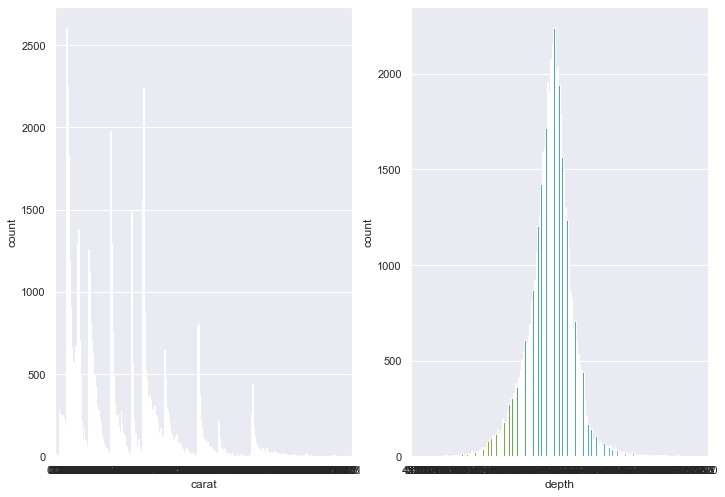

In [34]:
diamonds_data = sns.load_dataset('diamonds')
plt.subplot(1, 2, 1)
sns.countplot(x='carat', data=diamonds_data)
plt.subplot(1, 2, 2)
sns.countplot(x='depth', data=diamonds_data)

## Создание красивых графиков с помощью стилей
Seaborn дает возможность менять интерфейс ваших графиков. Для этого из коробки у нас в распоряжении есть пять стилей: darkgrid, whitegrid, dark, white и ticks.

<AxesSubplot:xlabel='year', ylabel='passengers'>

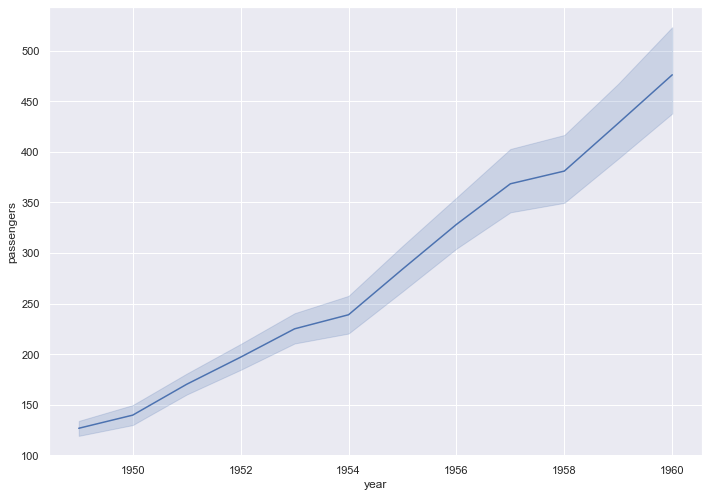

In [35]:
sns.set_style("darkgrid")
sns.lineplot(data = flights_data, x = "year", y = "passengers")

<AxesSubplot:xlabel='year', ylabel='passengers'>

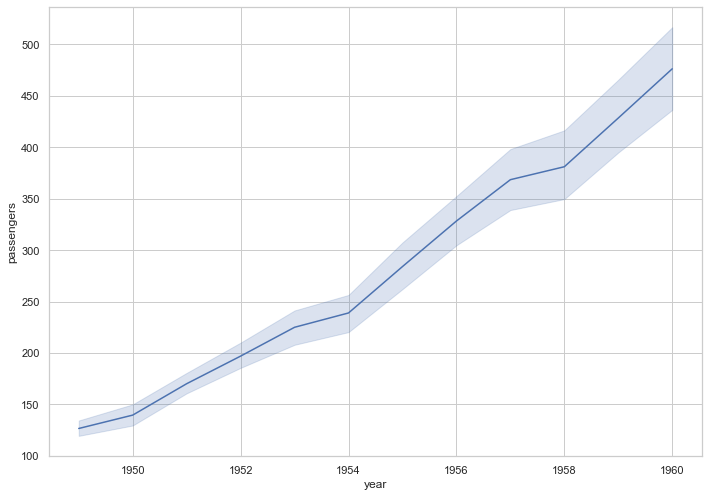

In [36]:
sns.set_style("whitegrid")
sns.lineplot(data=flights_data, x="year", y="passengers")

## Задача
Воспользоваться набором данных tips

1. Создать новую колонку - отношение чаевых ко всему счету
2. Построить гистограмму распределения новой колонки
3. Посмотреть меняется ли процент чаевых в зависимости от времени дня (колонка time, параметр hue)
4. Посмотреть на bar plot колличество чаевых в зависимости от дня недели

# Полезные ссылки

- [Git](https://git-scm.com/downloads)

- [Anaconda](https://www.anaconda.com/products/individual#Downloads)

- [VS Code](https://code.visualstudio.com/download)

- [Шпаргалка по анаконде](https://docs.conda.io/projects/conda/en/4.6.0/_downloads/52a95608c49671267e40c689e0bc00ca/conda-cheatsheet.pdf)

- [Шпаргалка по гиту](https://education.github.com/git-cheat-sheet-education.pdf)

- [Установка jupyterlab (вариант с conda install, не забываем активировать окружение)](https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.html)

- [Небольшой курс по numpy-pandas-matplotlib, если хочется интерактивных задач](https://www.sololearn.com/learning/1161)

# Домашняя работа

## Easy

Скачать данные отсюда (кнопка download all снизу):

[https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)

Это данные о пассажирах Титаника и информация о том, кто выжил, а кто нет. Будем анализировать файл train.csv.

Необходимо прочитать файл, посчитать процент детей (младше 18 лет), соотношение мужчин/женщин на борту

## Normal

Посчитать по скольким людям нет информации (пола или возраста)

Вывести гистограмму по возрасту пассажиров

Посчитать какой процент мужин и женщин выжили, какой процент детей выжили. 

Посчитать [корреляцию](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) между возрастом и выживаемостью, полом и выживаемостью


## Hard

Сделав вывод по данным, написать простейшую модель, которая будет определять по входным данным, выжил ли человек. Проверить свою гипотезу на данных train.csv, оценить успешность модели. Прогнать модель на файле test.csv

Загрузить решение на kaggle.

Решение представляет из себя файл с 2 колонками: PassengerId и Survived. Id пассажиров и их данные нужно брать из файла test.csv.